# FD GC eval comparison


In [1]:
from gnn_tracking.utils.nomenclature import variable_manager
from pytorch_lightning import Trainer

from gnn_tracking.models.graph_construction import MLGraphConstruction

from ocpaper231.data import model_exchange_path
from gnn_tracking.graph_construction.k_scanner import GraphConstructionKNNScanner
from gnn_tracking.training.ml import MLModule
import pandas as pd
from matplotlib import pyplot as plt
import scienceplots
from gnn_tracking.analysis.plotutils import Plot
from sklearn.manifold import TSNE
from matplotlib.ticker import NullLocator

from pathlib import Path

from ocpaper231.data import get_dm
plt.style.use(["science", "notebook"])

In [9]:
dm = get_dm(v=10, n_val=2)

[21:48:29] INFO: DataLoader will load 900 graphs (out of 900 available).
[21:48:29] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v10/part_1/data21000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v10/part_1/data21999_s0.pt
[21:48:29] INFO: DataLoader will load 2 graphs (out of 1000 available).
[21:48:29] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v10/part_9/data29000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v10/part_9/data29001_s0.pt


In [10]:
def get_model_data(chkpt_path):
    lmodel = MLModule.load_from_checkpoint(chkpt_path, map_location="cpu")
    lmodel.gc_scanner = GraphConstructionKNNScanner(ks=list(range(10, 30)))
    trainer = Trainer()
    _ = trainer.validate(model=lmodel, datamodule=dm, verbose=False)
    return lmodel.gc_scanner.get_results().df

In [11]:
ckpt_home = Path("/home/kl5675/Documents/23/git_sync/hyperparameter_optimization2/scripts/full_detector/lightning_logs/")
df = get_model_data(ckpt_home / "garrulous-peach-manatee/checkpoints" /  'epoch=111-step=50400.compat.ckpt' )

[21:48:32] DEBUG: Getting class GraphConstructionFCNN from module gnn_tracking.models.graph_construction
[21:48:32] DEBUG: Getting class GraphConstructionHingeEmbeddingLoss from module gnn_tracking.metrics.losses.metric_learning
[21:48:32] DEBUG: Getting class GraphConstructionKNNScanner from module gnn_tracking.graph_construction.k_scanner
/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
[21:48:32] INFO: DataLoader will load 2 graphs (out of 1000 available).
[21:48:32] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_

Validation DataLoader 0: 100%|███████████████████████████████████████████████| 2/2 [01:48<00:00,  0.02it/s]

NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.


Validation DataLoader 0: 100%|███████████████████████████████████████████████| 2/2 [01:49<00:00,  0.02it/s]


In [18]:
old_checkpoint = ckpt_home / "amber-gibbon-of-joy/checkpoints" /   'epoch=78-step=71100.compat.ckpt'

def make_ckpt_compatible(ckpt):
    margs = ckpt["hyper_parameters"]
    largs = ckpt["hyper_parameters"]["loss_fct"]["init_args"]
    for key, value in copy.deepcopy(margs).items():
        if key.startswith("lw_"):
            largs[key] = value
            del margs[key]
    ckpt["hyper_parameters"] = margs
    ckpt["hyper_parameters"]["loss_fct"]["init_args"] = largs
    ckpt["hyper_parameters"]["loss_fct"]["init_args"]["pt_thld"] = ckpt["hyper_parameters"]["loss_fct"]["init_args"].pop("attr_pt_thld")
    ckpt["hyper_parameters"]["loss_fct"]["class_path"] = ckpt["hyper_parameters"]["loss_fct"]["class_path"].replace("losses", "losses.metric_learning")
    ckpt["hyper_parameters"]["model"]["init_args"]["alpha"] = 1-ckpt["hyper_parameters"]["model"]["init_args"].pop("beta")
    return ckpt

import torch
import copy
ckpt = make_ckpt_compatible(torch.load(old_checkpoint))
compat_name = old_checkpoint.parent / (old_checkpoint.stem + "_newcompatible.ckpt")
torch.save(ckpt, compat_name)


In [34]:
str(compat_name)

'/home/kl5675/Documents/23/git_sync/hyperparameter_optimization2/scripts/full_detector/lightning_logs/amber-gibbon-of-joy/checkpoints/epoch=78-step=71100.compat_newcompatible.ckpt'

In [20]:
df2 = get_model_data(compat_name)

[22:00:30] DEBUG: Getting class GraphConstructionFCNN from module gnn_tracking.models.graph_construction


[22:00:30] DEBUG: Getting class GraphConstructionHingeEmbeddingLoss from module gnn_tracking.metrics.losses.metric_learning
[22:00:30] DEBUG: Getting class GraphConstructionKNNScanner from module gnn_tracking.graph_construction.k_scanner
/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
[22:00:30] INFO: DataLoader will load 2 graphs (out of 1000 available).
[22:00:30] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v10/part_9/data29000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/ob

Validation DataLoader 0: 100%|███████████████████████████████████████████████| 2/2 [01:50<00:00,  0.02it/s]

NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.


Validation DataLoader 0: 100%|███████████████████████████████████████████████| 2/2 [01:50<00:00,  0.02it/s]


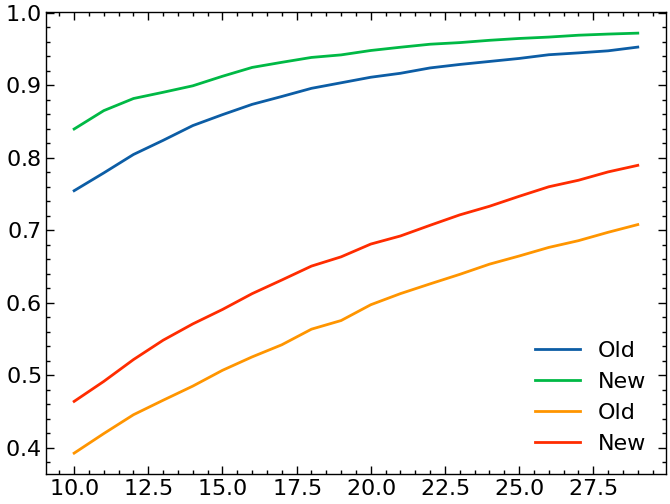

In [32]:
fig, ax = plt.subplots()
ax.plot(df["k"], df["max_double_majority_pt0.9"], label="Old")
ax.plot(df2["k"], df2["max_double_majority_pt0.9"], label="New")
ax.plot(df["k"], df["max_perfect_pt0.9"], label="Old")
ax.plot(df2["k"], df2["max_perfect_pt0.9"], label="New")
ax.legend()